In [23]:
# Decision trees with some form of pruning
# Neural networks
# Boosting
# Support Vector Machines
# k-nearest neighbors

In [24]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# 1. Titanic

In [36]:
dataset_dir = '~/Projects/Dataset/titanic'
dataset = pd.read_csv(dataset_dir + '/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
dataset.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Penasco y Castellana, Mrs. Victor de Satode (M...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## 1.1 Preprocessing

### 1.1.1 Complete data

In [40]:
# Drop 'PassengerId', 'Name' and Ticket' -- don't seem to be particular interesting, 
# Drop 'Cabin' -- too few data, 
dataset = dataset.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

### 1.1.2 Fill missing ages

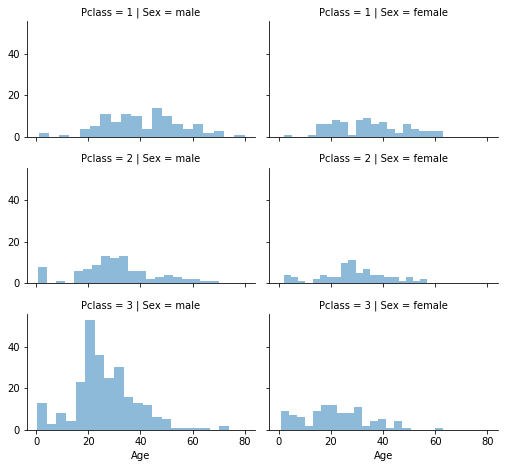

In [41]:
grid = sns.FacetGrid(dataset, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [65]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) 
# to calculate guessed values of Age for the six combinations.
guess_ages = np.zeros((2,3))

for i,sex in enumerate(['male','female']):
    for j in range (0, 3):
        guess_df = dataset[(dataset['Sex'] == sex) & \
                           (dataset['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()
        guess_ages[i, j] = int(age_guess)

for i,sex in enumerate(['male','female']):
    for j in range(0, 3):
        dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == sex) & 
                    (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]

dataset["Age"].isnull().sum()

0

In [43]:
# age = dataset['Age']
# size = age.isnull().sum()
# age_mean = age.dropna().mean()
# age_std = age.dropna().std()
# age_rnd = np.random.randint(mean - std, mean + std, size=size)
# # fill NaN values in Age column with random values generated
# age_slice = dataset["Age"].copy()
# age_slice[np.isnan(age_slice)] = rand_age
# dataset.loc(["Age"] = age_slice
# dataset["Age"] = train_df["Age"].astype(int)
# print(age.mean(), age.std())

29.69911764705882 14.526497332334042


### 1.1.3 Fill missing embarked

In [68]:
# Series.mode Return the highest frequency value in a Series.
common_port = dataset.Embarked.dropna().mode()[0]
dataset['Embarked'] = dataset['Embarked'].fillna(common_port)
print(common_port)

S


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 1.1.4 Convert "Sex"

In [9]:
# Convert sex from text to numerical
dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### 1.1.5 Convert "Age" to groups

In [73]:
dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0
dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 24), 'Age'] = 1
dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [72]:
dataset['Age'].value_counts()

1.0     493
2.0     218
0.0     100
3.0      69
65.0      3
70.0      2
71.0      2
70.5      1
74.0      1
80.0      1
66.0      1
Name: Age, dtype: int64

### 1.1.6 Convert "Fare" to groups

In [ ]:
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
dataset['Fare'] = dataset['Fare'].astype(int)

### 1.1.7 Convert "Embarked" to groups

In [70]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 1.1.8 Split data to train and test

# 1.2 Model

In [ ]:
# cros

### 1.2.1 Decision trees with some form of pruning

### 1.2.2 Neural networks

### 1.2.3 Boosting

### 1.2.4 Support Vector Machines

### 1.2.5 k-nearest neighbors